# Trefoil knot

In [1]:
from src.distance        import *
from src.datasets        import *
from mpl_toolkits        import mplot3d
from ripser              import Rips
from src.DTM_filtrations import *
import matplotlib.colors as colors

In [2]:
sample = np.loadtxt('data/trefoil_data.txt')
out = np.loadtxt('data/trefoil_out.txt')
data = np.concatenate((sample, out))

# data can also be generated using the function trefoil()
#data = trefoil(1490, 'normal', 0.15)

#Outliers can be generated as follows:
#n_out = 10
#X_out = (np.random.rand(n_out)-0.5)*5
#Y_out = (np.random.rand(n_out)-0.5)*5
#Z_out = (np.random.rand(n_out)-0.5)*5
#out = np.column_stack((X_out,Y_out,Z_out))   

In [3]:
cmap = plt.get_cmap('Blues')
new_cmap = truncate_colormap(cmap, 0.4, 1)

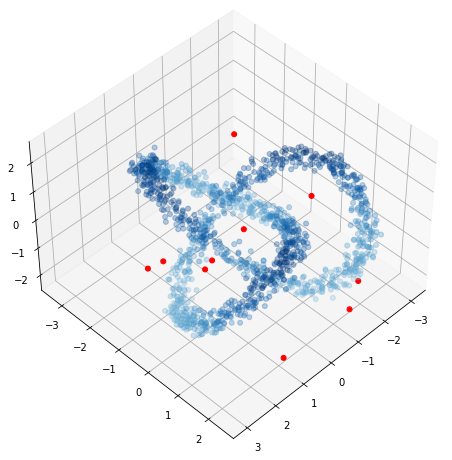

In [7]:
fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection='3d')
ax.scatter(sample[:,0], sample[:,1], sample[:,2], s=25, alpha=0.3, c=sample[:,2], cmap=new_cmap)
ax.scatter(out[:,0], out[:,1], out[:,2], s=25, alpha=1, color='red')
ax.view_init(45,45)
plt.show()

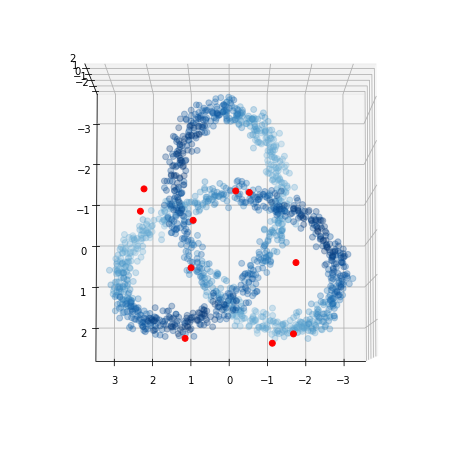

In [8]:
fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection='3d')
ax.scatter(sample[:,0], sample[:,1], sample[:,2], s=35, alpha=0.3,  c=sample[:,2], cmap=new_cmap)
ax.scatter(out[:,0], out[:,1], out[:,2], s=35, alpha=1, color='red')
ax.view_init(85,90)
plt.show()

# Persistence diagrams

We compare the output of teh computation of persistent homology for different choices of distance, and test its sensitivity to outliers.

### Euclidean Distance

- **Without outliers**

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


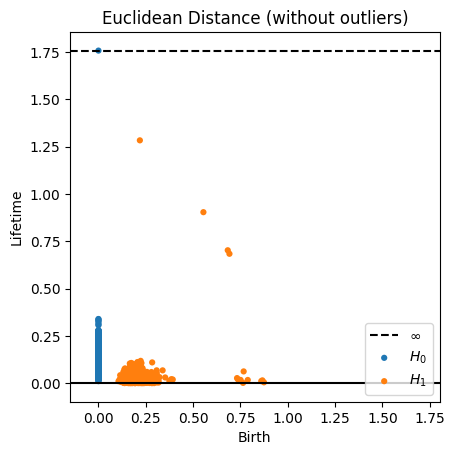

In [14]:
rips = Rips()
dgms = rips.fit_transform(sample)
rips.plot(dgms, lifetime=True)
plt.title('Euclidean Distance (without outliers)');

- **With outliers**

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


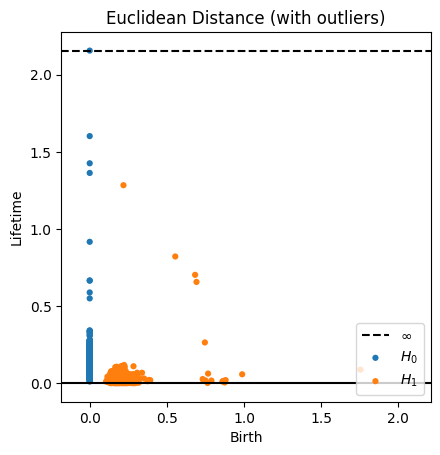

In [18]:
rips = Rips()
dgms = rips.fit_transform(data)
rips.plot(dgms, lifetime=True)
plt.title('Euclidean Distance (with outliers)');

### K-NN distance

- **Without outliers**

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


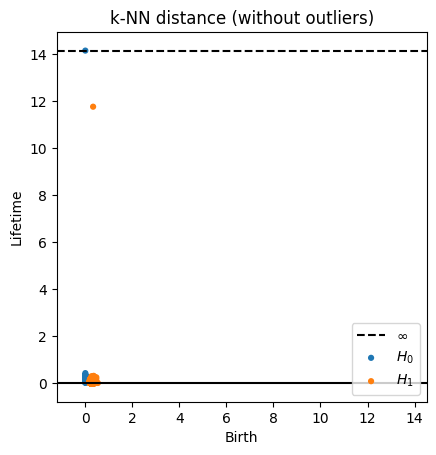

In [13]:
rips = Rips()
matrix = compute_kNN_distance(sample, 10)
dgms = rips.fit_transform(matrix, distance_matrix=True)
rips.plot(dgms, lifetime=True)
plt.title('k-NN distance (without outliers)');

- **With outliers**

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


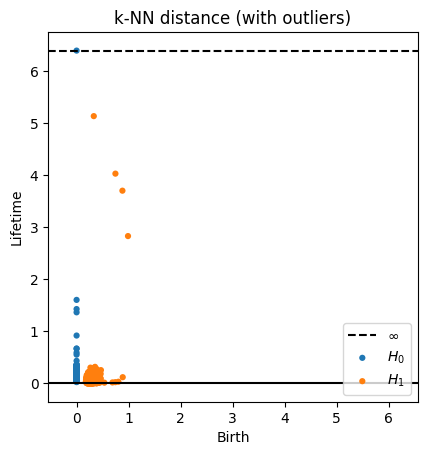

In [12]:
rips = Rips()
matrix = compute_kNN_distance(data, 10)
dgms = rips.fit_transform(matrix, distance_matrix=True)
rips.plot(dgms, lifetime=True)
plt.title('k-NN distance (with outliers)');

### DTM

Text(0.5, 0.92, 'Values of the DTM on X with parameter m=0.01')

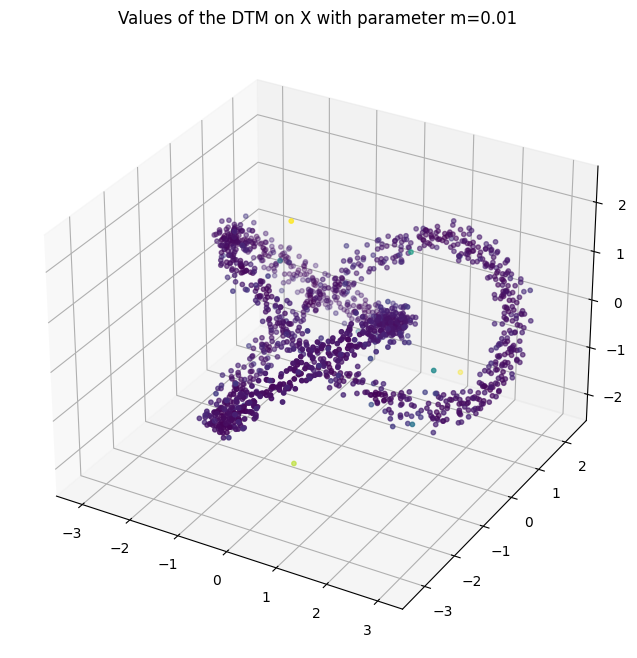

In [14]:
m = 0.01                   
DTM_values = DTM(data,data,m)             

# plot of the DTM
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.scatter(data[:,0], data[:,1], data[:,2], c=DTM_values, s = 10)
ax.set_title('Values of the DTM on X with parameter m='+str(m))

- **Without outliers**

Alpha Weighted Rips Complex is of dimension 2 - 32938 simplices - 1490 vertices. Filtration maximal value is inf.
Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


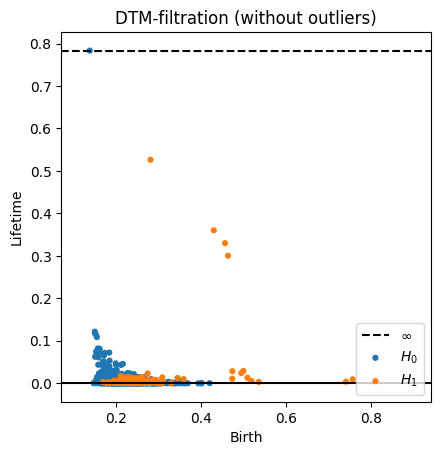

In [16]:
p = 2
dimension_max = 2

# compute the persistence diagram
simplex_tree_DTM_alpha = AlphaDTMFiltration(sample, m, p, dimension_max)
diagram_DTM_alpha = simplex_tree_DTM_alpha.persistence()    

# plot the persistence diagram
rips = Rips()
rips.plot(gudhi_to_ripser(diagram_DTM_alpha), lifetime = True)
plt.title('DTM-filtration (without outliers)');

- **With outliers**

Alpha Weighted Rips Complex is of dimension 2 - 33009 simplices - 1500 vertices. Filtration maximal value is inf.
Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


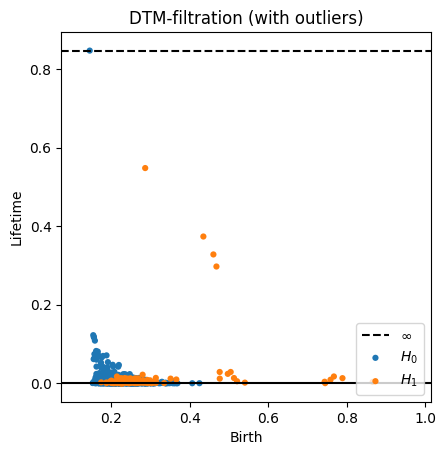

In [17]:
simplex_tree_DTM_alpha = AlphaDTMFiltration(data, m, p, dimension_max)
diagram_DTM_alpha = simplex_tree_DTM_alpha.persistence()    

# plot the persistence diagram
rips = Rips()
rips.plot(gudhi_to_ripser(diagram_DTM_alpha), lifetime = True)
plt.title('DTM-filtration (with outliers)');

### Fermat Distance

- **Without outliers**

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


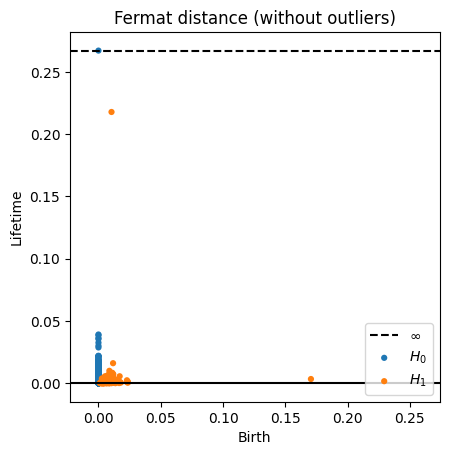

In [10]:
dgms = Fermat_dgm(sample, p=3, rescaled=False, title = 'Fermat distance (without outliers)')

- **With outliers**

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


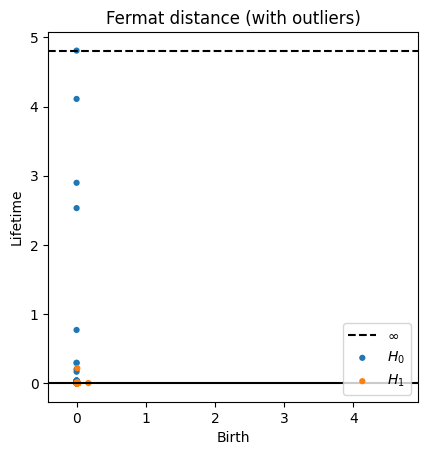

In [6]:
dgms = Fermat_dgm(data, p=3, rescaled=False, title = 'Fermat distance (with outliers)')

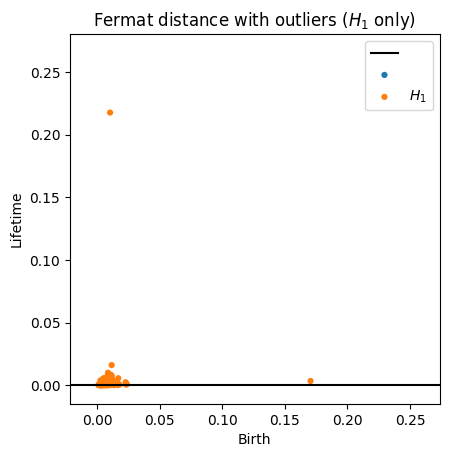

In [23]:
rips.plot([dgms[0][:0], dgms[1]], lifetime=True, title='Fermat distance with outliers ($H_1$ only)')
plt.legend(['', '', '$H_1$']);